In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/Sujithkumar/Desktop/Cognifyz/Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [2]:
if 'Price range' in df.columns:
    most_common = df['Price range'].mode()[0]
    print(f"The most common price range is: {most_common}")

    print("\nPrice range distribution:")
    print(df['Price range'].value_counts())
else:
    print("Column 'Price range' not found.")

The most common price range is: 1

Price range distribution:
Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64



Average rating by price range:
 Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


C:\Users\Sujithkumar\AppData\Local\Temp\ipykernel_2976\1282723943.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_price.index, y=avg_rating_by_price.values, palette='Blues_d')


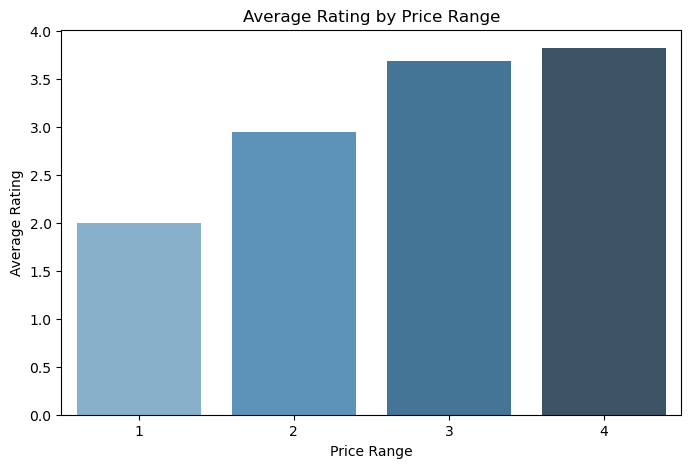

In [3]:
if 'Price range' in df.columns and 'Aggregate rating' in df.columns:
    avg_rating_by_price = df.groupby('Price range')['Aggregate rating'].mean().sort_index()
    print("\nAverage rating by price range:\n", avg_rating_by_price)

    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8,5))
    sns.barplot(x=avg_rating_by_price.index, y=avg_rating_by_price.values, palette='Blues_d')
    plt.title("Average Rating by Price Range")
    plt.xlabel("Price Range")
    plt.ylabel("Average Rating")
    plt.show()
else:
    print("Required columns for price range and rating not found.")

In [4]:
if 'Rating color' in df.columns and 'Price range' in df.columns and 'Aggregate rating' in df.columns:
    avg_rating_color = df.groupby(['Price range', 'Rating color'])['Aggregate rating'].mean().reset_index()

    max_row = avg_rating_color.loc[avg_rating_color['Aggregate rating'].idxmax()]
    print("\nHighest average rating is:")
    print(f"Price Range: {max_row['Price range']}, Color: {max_row['Rating color']}, Rating: {max_row['Aggregate rating']:.2f}")
else:
    print("Column 'Rating color' not found or missing required fields.")


Highest average rating is:
Price Range: 4, Color: Dark Green, Rating: 4.71


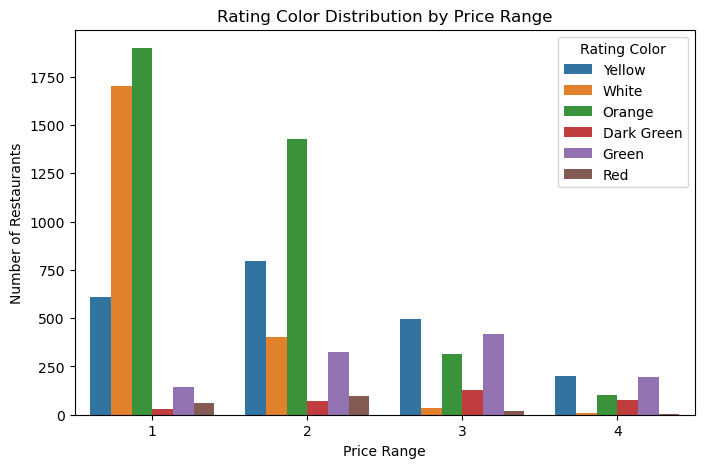

In [5]:
if 'Rating color' in df.columns and 'Price range' in df.columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x='Price range', hue='Rating color')
    plt.title("Rating Color Distribution by Price Range")
    plt.xlabel("Price Range")
    plt.ylabel("Number of Restaurants")
    plt.legend(title="Rating Color")
    plt.show()